# Week3 - Assignment - Multiple Regression

By Xijian Lim

Applying Multiple Regression

 - We are looking at the relationship between suicide rate, urban rate and income per person. 
 The basic assumption we are testing is to see if urbanisation is a stressor that could lead to higher suicide rates 
 and if income is a confounding variable
 
 The dataset used will be gapminder dataset

In [18]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [4]:
data = pd.read_csv('~/Desktop/Coursera - data science/regression modelling/gapminder.csv')

In [5]:
#cleaning up the dataset to be numeric
data['incomeperperson']=pd.to_numeric(data['incomeperperson'], errors='coerce')
data['suicideper100th']=pd.to_numeric(data['suicideper100th'], errors='coerce')
data['urbanrate']=pd.to_numeric(data['urbanrate'], errors='coerce')

- note: because we are using quantitative variables, we will need to centre these values by dividing them by their respective means

In [6]:
# center quantitative IVs for regression analysis
sub1=data[['incomeperperson','suicideper100th','urbanrate']].copy()

sub1['income_c'] = (sub1['incomeperperson'] - sub1['incomeperperson'].mean())
#sub1['suicide_c']= (sub1['incomeperperson'] - sub1['incomeperperson'].mean())
sub1['urbanrate_c'] = (sub1['urbanrate'] - sub1['urbanrate'].mean())





Finally we can apply our first regression model: Looking at the relationship between
urban rate and suicide rates using a simple linear regression



We'll be conducting a stats model function as well as plot the relationship between these two variables using both a linear and polynomial best fit line to show the correlation in these two variables in our sample

In [7]:
# linear regression analysis
reg1 = smf.ols('suicideper100th ~ urbanrate_c', data=sub1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.182
Date:                Fri, 03 Nov 2017   Prob (F-statistic):             0.0761
Time:                        14:39:27   Log-Likelihood:                -605.22
No. Observations:                 186   AIC:                             1214.
Df Residuals:                     184   BIC:                             1221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.6673      0.463     20.902      

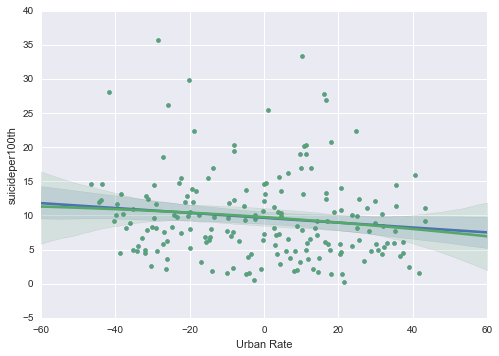

In [8]:
# first order (linear) scatterplot
scat1 = sns.regplot(x="urbanrate_c", y="suicideper100th", scatter=True, data=sub1)
plt.xlabel('Urban Rate')
plt.ylabel('suicideper100th')

scat1 = sns.regplot(x="urbanrate_c", y="suicideper100th", order =2, scatter=True, data=sub1)
plt.xlabel('Urban Rate')
plt.ylabel('suicideper100th')

# Interpreting The First Stats Model:
<br> 
<br>
<br>
<font size=3>
The p-value and p>|t| values in the model are not statistically significant (p>0.05 and p>|t| >0.001)<br>
At a R-square value of 0.017, our model shows that urban rate is capturing 1.7% of the variability in suicide rates for these countries in our subset. As such we have to adopt the null hypothesis for our first model
<br>
<br>
The slope of the chart shows a small negative correlation after using our centred predictor/independent variable
<br>
<br>
<font size = 4><font color=blue>But what about income levels? We can apply another model to look at the relationship between income and suicide

In [9]:
# linear regression analysis
reg2 = smf.ols('suicideper100th ~ income_c', data=sub1).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.007692
Date:                Fri, 03 Nov 2017   Prob (F-statistic):              0.930
Time:                        14:39:28   Log-Likelihood:                -586.59
No. Observations:                 181   AIC:                             1177.
Df Residuals:                     179   BIC:                             1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6766      0.464     20.869      0.0

# Interpreting The Second Stats Model:
<br> 
<br>
<br>
<font size=3>
The p-value and p>|t| values in the model are not statistically significant (p>0.05 and p>|t| >0.001) as well <br>
At a R-square value of 0, we have to safely adopt the null hypothese that thee is no clear relationship between the
levels of income in a country and suicide rates
<br>
<br>
As this assignment covers multiple regression, we can look at multiple predictive variables in our stats model; all 
the while controlling for each other. 
<br>
<br>
We'll be adding other variables: employment rate, co2emissions and alcohol consumption. The rationale with picking these added variables is to see if pollution, vice and economic stressors somehow impact suicide rates in respective societies

<font size=5><font color=black> Adding Other Variables for Multiple-Regression

In [10]:
# data management for added variables
#cleaning up the dataset to be numeric
data['co2emissions']=pd.to_numeric(data['co2emissions'], errors='coerce')
data['alcconsumption']=pd.to_numeric(data['alcconsumption'], errors='coerce')
data['employrate']=pd.to_numeric(data['employrate'], errors='coerce')

sub2=data[['incomeperperson','suicideper100th','urbanrate','co2emissions','alcconsumption','employrate']].copy()


In [11]:
#
sub2['income_c'] = (sub2['incomeperperson'] - sub2['incomeperperson'].mean())
sub2['urbanrate_c'] = (sub2['urbanrate'] - sub2['urbanrate'].mean())
sub2['co2_c'] = (sub2['co2emissions'] - sub2['co2emissions'].mean())
sub2['alchohol_c'] = (sub2['alcconsumption'] - sub2['alcconsumption'].mean())
sub2['employment_c'] = (sub2['employrate'] - sub2['employrate'].mean())

In [12]:
reg3=smf.ols('suicideper100th ~ urbanrate_c +  income_c + co2_c + alchohol_c + employment_c', data=sub2).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     9.036
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           1.50e-07
Time:                        14:39:31   Log-Likelihood:                -501.89
No. Observations:                 160   AIC:                             1016.
Df Residuals:                     154   BIC:                             1034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.8143      0.459     21.380   

# Interpreting The Third Stats Model:
<br> 
<br>
<br>
<font size=3>
Interpreting this stats model appears to be tricky because the p-value<0.05 indicating statistical significance
but the only predictors that has a p>|t| value less than 0.05 are urbanrates and alchohol consumption. <u>Note</u>: urban rate had no statistically significant relationship in our previous model, but it does now when using other predictors
<br>
<br>
What could this mean? From our model, we can infer a relationship between suicide and alchohol in socieities where
urbanization is a confounder.
<br>
<br>


<br>
<font size=4><font color=black> Lets have a closer inspection at the relationship between alchohol consumption and suicide:
<br> 

In [13]:
# lets look at alchohol and suicide
reg4=smf.ols('suicideper100th ~ alchohol_c', data=sub2).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     26.33
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           7.32e-07
Time:                        14:39:32   Log-Likelihood:                -590.18
No. Observations:                 185   AIC:                             1184.
Df Residuals:                     183   BIC:                             1191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5966      0.435     22.086      0.0

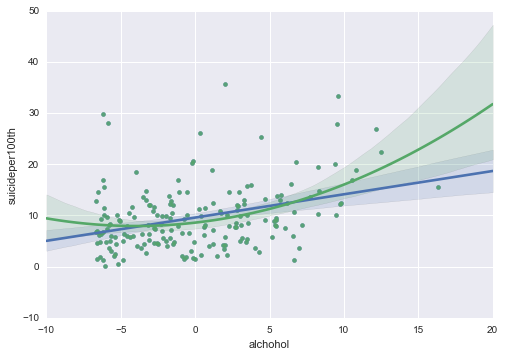

In [14]:
# first order (linear) scatterplot
scat1 = sns.regplot(x="alchohol_c", y="suicideper100th", scatter=True, data=sub2)
plt.xlabel('alchohol')
plt.ylabel('suicideper100th')

scat1 = sns.regplot(x="alchohol_c", y="suicideper100th", order =2, scatter=True, data=sub2)
plt.xlabel('alchohol')
plt.ylabel('suicideper100th')

<font><font size=3>With p-value<0.05 this model is statistically significant, suggesting a positive correlation in alchohol consumption and suicide.



now lets add urbanrates to the mix


In [15]:
# adding urban rates
reg5=smf.ols('suicideper100th ~ alchohol_c + urbanrate_c', data=sub2).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     19.19
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           2.84e-08
Time:                        14:39:34   Log-Likelihood:                -572.75
No. Observations:                 181   AIC:                             1152.
Df Residuals:                     178   BIC:                             1161.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5583      0.431     22.188      

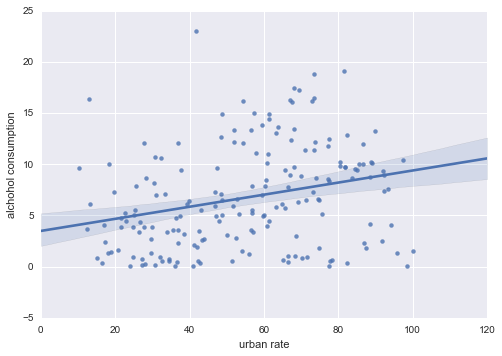

In [16]:
# looking at alchohol and urban_rates
scat1 = sns.regplot(x="urbanrate", y="alcconsumption", scatter=True, data=sub2)
plt.xlabel('urban rate')
plt.ylabel('alchohol consumption')

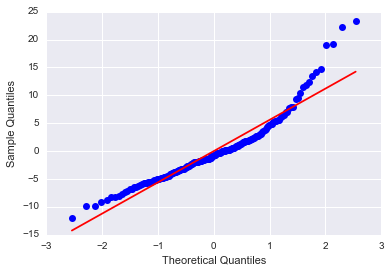

In [19]:
# Adding the residuals plot shows that there are residuals that fall outside the predicted model

fig1=sm.qqplot(reg5.resid, line='r')

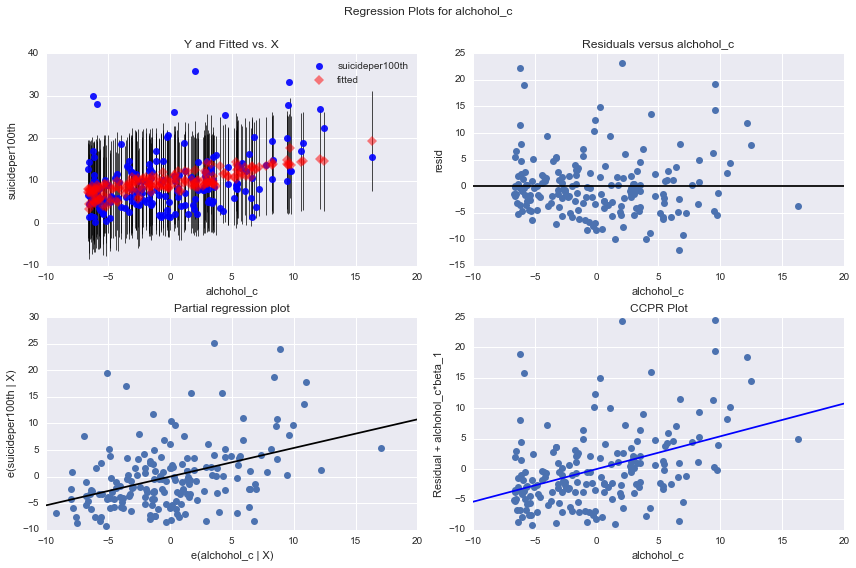

In [21]:
# additional regression diagnostic plots
import matplotlib.pyplot as plt
import seaborn

fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(reg5,  "alchohol_c", fig=fig2)

In [ ]:
# as shown by the partial regression plot, the residuals are concentrated roughly with the line of best fit, indicating a great deal of female employment
# a low rate of prediction error

Figure(432x288)


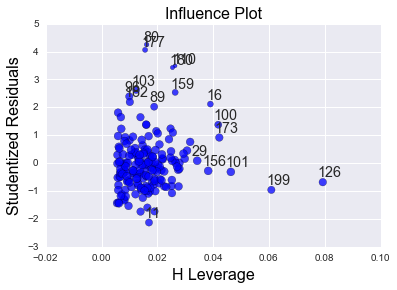

In [22]:
# leverage plot

#used to find outliers that are unduly influencing the model
fig3=sm.graphics.influence_plot(reg5, size=4)
print(fig3)

# SUMMARY OF FINDINGS
<br>
<br>
<font size=3>
here we can see that the model suggests that alcohol and urban rates have a positive relationship between 
with the suicide rates of countries in our datasets.(p<0.05 and P>|t| <0.01 for alchohol and urban rates.
<br>
Because urban rates as a stand-alone independent variable was not statistically significant, we can interpret that alchohol consumption <u>confounds</u> urban rate in its relationship to suicide. But what could this mean? As we see from the coeficient of -0.0657, countries with higher urban rates have lower suicide rates after controlling for alchohol consumption. 
<br>
<br>
Does this mean that a more rural country with higher levels of alchohol consumption would experience a higher suicide rate per capita as oppose to a more urbanized country with similar achohol consumption? These are hard questions and I welcome feedback from my reviewers in trying to interpret this relationship.

As added background an article (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3071536/ there does appear to be some evidence of a compounding effect of living in less urban areas and alchohol consumption with suicides:
<i>
'Bar densities in particular appear related to suicide, meaning, because this is an aggregate-level spatial analysis, that suicides, both attempted and completed, occur at greater rates in rural community areas with greater bar densities'</i>

 